In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso, RANSACRegressor
import statsmodels.formula.api as sm
from statsmodels.api import add_constant
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler

In [2]:
df = pd.read_csv("C:/Users/682146/Desktop/work/Python JPA/Assignments/carprice.csv")

In [3]:
df["symboling"] = df["symboling"].astype('category')

In [4]:
df["symboling"].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [5]:
#Separate car names from the "CarName" variable
df["cars"] = df["CarName"].str.split().str[0]

In [6]:
counts = df["cars"].value_counts()

In [7]:
ind_rename = counts[counts<10].index

In [8]:
df["cars"] = df["cars"].replace(list(ind_rename),"other")

In [9]:
df["cars"].value_counts()

other         82
toyota        31
nissan        17
mazda         15
honda         13
mitsubishi    13
subaru        12
volvo         11
peugeot       11
Name: cars, dtype: int64

In [10]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'cars'],
      dtype='object')

In [11]:
df.dtypes

car_ID                 int64
symboling           category
CarName               object
fueltype              object
aspiration            object
doornumber            object
carbody               object
drivewheel            object
enginelocation        object
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype            object
cylindernumber        object
enginesize             int64
fuelsystem            object
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
cars                  object
dtype: object

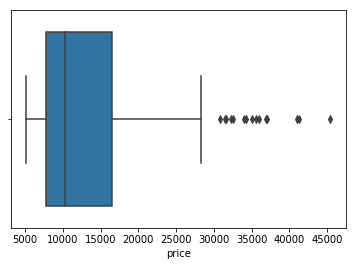

In [12]:
sns.boxplot(df["price"])

In [13]:
df = df.drop(["CarName","car_ID","symboling"],axis=1)

In [14]:
#X = df
X = df.drop("price",axis=1)
y = df["price"]

In [15]:
#Separate numeric and category columns as two different dataframes
df_cat = X.select_dtypes(include=['object'])
df_num = X.select_dtypes(exclude=['object'])

In [16]:
#apply label encoder for categorical columns 
le = LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)

In [17]:
#perform one hot encoding on categorical columns 
df_cat_dum = pd.get_dummies(df_cat.astype(str))

D:\Development_Avecto\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


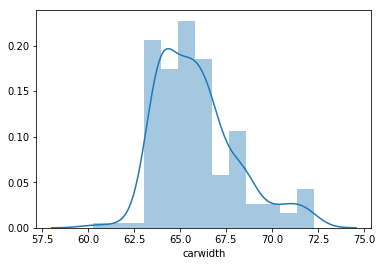

In [18]:
sns.distplot(df_num["carwidth"])

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

In [20]:
scaled_features_df = pd.DataFrame(scaled_data, index=df_num.index, columns=df_num.columns)

In [21]:
#Concatenate dummy columns, numeric and the target (dependent variable) as a final dataframe
df_final = pd.concat([df_cat_dum,scaled_features_df,y],axis=1)

In [22]:
X = df_final.drop("price",axis=1)
y = df_final["price"]

In [23]:
#Split the data from training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [24]:
lm = LinearRegression()
lm.fit(X_train, y_train)

Y_pred = lm.predict(X_test)

In [25]:
mse = mean_squared_error(y_test,Y_pred)

In [26]:
print(mse)

7077177.25


In [27]:
r2_score(y_test,Y_pred)

0.8718238702041528

In [28]:
lm.score(X_train, y_train)

0.9462163375939161

In [29]:
lm.score(X_test,y_test)

0.8718238702041528

In [30]:
lr = Lasso(alpha=0.1)
model3 = lr.fit(X_train, y_train)

D:\Development_Avecto\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [31]:
Y_pred1 = lr.predict(X_test)

In [32]:
mse = mean_squared_error(y_test, Y_pred1)
print(mse)

6945688.721110869


In [33]:
r2_score(y_test, Y_pred1)

0.8742052844531116

In [34]:
lr.coef_

array([ 1.34132992e+04, -0.00000000e+00, -9.43125922e+02,  1.71208015e-10,
       -4.02881042e+01,  0.00000000e+00,  3.19014894e+03,  4.60405740e+02,
       -6.03641925e+02,  7.73829673e+01, -1.15843322e+03, -0.00000000e+00,
       -8.20698551e+02,  3.33584188e+02, -7.03740628e+03,  1.94262422e-09,
       -2.63318511e+02,  0.00000000e+00, -1.12612613e+03,  3.15563022e+03,
        0.00000000e+00, -4.48140277e+03,  4.04348746e+03,  7.92500163e+03,
       -3.82007737e+03, -3.94342293e+03,  9.93644576e+02,  3.63506611e+03,
       -9.75118225e+01,  0.00000000e+00, -2.10245471e+02,  1.50939043e+03,
       -1.39688243e+03,  3.73811340e+02, -1.72473731e+03,  8.32979288e+02,
       -1.68322930e+02, -7.61741043e+02,  2.48566870e+03,  1.23997279e+03,
       -2.64052050e+02,  2.24290306e+02,  1.37960060e+03, -2.61597689e+02,
       -2.14530639e+02, -4.65735945e+02, -2.30420571e+03,  2.40259275e+02,
       -3.82481348e+02,  1.50981927e+03,  3.43185066e+02,  2.36537785e+03,
        3.04687080e+03,  

In [35]:
result = pd.DataFrame()
result["columns"]=X.columns
result["weights"] = lr.coef_

result.sort_values("weights",ascending=False, inplace=True)

result = result.loc[result["weights"]>0,:]

result.to_csv("results_carprices.csv",index=False)

In [36]:
X = add_constant(X)
model = sm.OLS(y, X).fit()
#predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     60.25
Date:                Tue, 22 Jan 2019   Prob (F-statistic):           1.84e-79
Time:                        17:17:39   Log-Likelihood:                -1833.2
No. Observations:                 205   AIC:                             3760.
Df Residuals:                     158   BIC:                             3917.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4917.5301    676.972      7.264      0.000    3580.449    6254.611
fueltype_0        6070.5583   2442.146      2.486      0.014    1247.096    1.09e+04
fueltype_1       -1153.0282   1904.944     -0.605      0.546   -4915.467    2609.411
aspiration_0      1511.8828    583.807      2.590      0.011     358.810    2664.955
aspiration_1      3405.6473    560.805      6.073      0.000    2298.006    4513.289
doornumber_0      2493.8764    433.534      5.752      0.000    1637.606    3350.146
doornumber_1      2423.6537    426.162      5.687      0.000    1581.944    3265.363
carbody_0         3431.4693    957.844      3.582      0.000    1539.639    5323.299
carbody_1          545.5976    846.841      0.644      0.520   -1126.991    2218.187
carbody_2          245.8336    469.705      0.523      0.601    -681.877    1173.544
carbody_3          948.6156    466.911      2.032      0.044      26.424    1870.807
carbody_4         -253.9859    648.439     -0.392      0.696   -1534.713    1026.741
drivewheel_0      1347.8495    713.311      1.890      0.061     -61.006    2756.705
drivewheel_1       961.9713    477.090      2.016      0.045      19.675    1904.268
drivewheel_2      2607.7093    624.998      4.172      0.000    1373.281    3842.138
enginelocation_0  -931.3890    732.980     -1.271      0.206   -2379.091     516.313
enginelocation_1  5848.9191    999.128      5.854      0.000    3875.550    7822.288
enginetype_0       959.0688   1216.179      0.789      0.432   -1442.997    3361.134
enginetype_1     -4646.3457   3566.700     -1.303      0.195   -1.17e+04    2398.216
enginetype_2      1309.3408   1107.058      1.183      0.239    -877.201    3495.883
enginetype_3      3894.7464   1192.626      3.266      0.001    1539.201    6250.292
enginetype_4      4086.9736    774.572      5.276      0.000    2557.122    5616.825
enginetype_5     -4123.5246   1099.716     -3.750      0.000   -6295.566   -1951.484
enginetype_6      3437.2709   1278.756      2.688      0.008     911.610    5962.932
cylindernumber_0  5807.0119   1866.108      3.112      0.002    2121.278    9492.746
cylindernumber_1 -3589.7362   1413.918     -2.539      0.012   -6382.354    -797.119
cylindernumber_2 -3488.8529   1474.639     -2.366      0.019   -6401.402    -576.304
cylindernumber_3   322.1160    802.322      0.401      0.689   -1262.545    1906.777
cylindernumber_4  3390.3285   1788.855      1.895      0.060    -142.824    6923.481
cylindernumber_5  -960.6080   4071.403     -0.236      0.814   -9002.004    7080.788
cylindernumber_6  3437.2709   1278.756      2.688      0.008     911.610    5962.932
fuelsystem_0      -338.0143   1668.772     -0.203      0.840   -3633.992    2957.964
fuelsystem_1      1398.4738    717.930      1.948      0.053     -19.504    2816.451
fuelsystem_2      -693.

In [37]:
model.params

const               4917.530114
fueltype_0          6070.558291
fueltype_1         -1153.028177
aspiration_0        1511.882833
aspiration_1        3405.647281
doornumber_0        2493.876396
doornumber_1        2423.653718
carbody_0           3431.469313
carbody_1            545.597575
carbody_2            245.833603
carbody_3            948.615560
carbody_4           -253.985937
drivewheel_0        1347.849498
drivewheel_1         961.971328
drivewheel_2        2607.709288
enginelocation_0    -931.389028
enginelocation_1    5848.919142
enginetype_0         959.068764
enginetype_1       -4646.345722
enginetype_2        1309.340785
enginetype_3        3894.746381
enginetype_4        4086.973619
enginetype_5       -4123.524606
enginetype_6        3437.270893
cylindernumber_0    5807.011906
cylindernumber_1   -3589.736239
cylindernumber_2   -3488.852932
cylindernumber_3     322.115969
cylindernumber_4    3390.328496
cylindernumber_5    -960.607978
                       ...     
fuelsyst

In [38]:
df_num.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


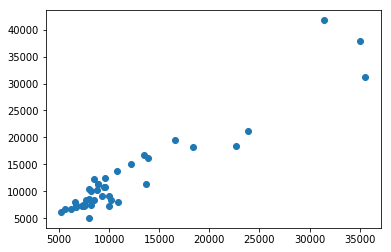

In [39]:
plt.scatter(y_test,Y_pred)